In [1]:
# IMPORTS
import re
import nltk
from pathlib import Path
import os
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation as LDA
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
folder_path = "C:/Users/forem/Code/text-as-data/people/Foreman/Adventure"
adventure_list = []

for file_name in os.listdir(folder_path):
    if file_name.endswith(".txt"):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, "r") as file:
            file_contents = file.read()
            adventure_list.append(file_contents)

print(len(adventure_list))


166


In [3]:
titles= []

for p in Path('C:/Users/forem/Code/text-as-data/people/Foreman/Adventure').glob('*.txt'):
    with open(p, mode="r", encoding="utf-16") as f:
        title = p.name[:-4]
        titles.append(title)

In [4]:
print(len(titles), titles[0:50])

166 ['127hours', '1492conquestofparadise', '2001aspaceodyssey', '2012', '30minutesorless', '9', 'abyssthe', 'adventuresofbuckaroobanzaiacrosstheeighthdimensionthe', 'airforceone', 'antz', 'armyofdarkness', 'avatar', 'avengersthe', 'avengersthe2012', 'beachthe', 'bigfish', 'bookofelithe', 'bourneidentitythe', 'bourneultimatumthe', 'brokenarrow', 'brothersbloomthe', 'cars2', 'castaway', 'chroniclesofnarniathelionthewitchandthewardrobe', 'cirquedufreakthevampiresassistant', 'clashofthetitans', 'cliffhanger', 'conanthebarbarian', 'coraline', 'croodsthe', 'crouchingtigerhiddendragon', 'danceswithwolves', 'despicableme2', 'detroitrockcity', 'djangounchained', 'dogma', 'dragonslayer', 'dumbanddumber', 'dune', 'e.t.', 'escapefroml.a.', 'escapefromnewyork', 'excalibur', 'existenz', 'fantasticfour', 'fantasticmrfox', 'findingnemo', 'flashgordon', 'fourfeathers', 'frozendisney']


In [5]:
print(adventure_list[46][0:100])

------------------------------------------------------------

FINDING NEMO Transcript v1.0

Copyrigh


In [6]:
all_texts = " ".join(adventure_list)

words = nltk.tokenize.word_tokenize(all_texts.lower())

word_series = pd.Series(words)

print(word_series.shape)
print(word_series.head())

(4882705,)
0        127
1      hours
2    written
3         by
4      simon
dtype: object


In [7]:
counts = word_series.value_counts()

print(counts.shape)

(72869,)


In [8]:
print(counts[0:20])

.      365386
the    242194
,      185550
a       95630
and     88594
to      88461
of      67338
's      52764
you     51745
in      48686
i       46144
it      44232
he      43687
his     40605
!       40190
is      39955
?       39109
)       38484
(       38403
on      34609
Name: count, dtype: int64


<Axes: >

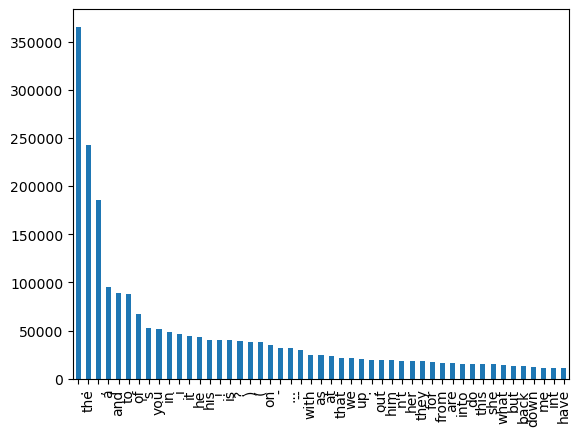

In [9]:
counts.iloc[0:49].plot(kind='bar')

In [10]:
vectorizer = CountVectorizer(lowercase = True)

# fit the model to the data 
# vecs = vectorizer.fit(texts)
X = vectorizer.fit_transform(adventure_list)

# see how many features we have
X.shape

(166, 56631)

In [11]:
# Convert:
df = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())

# See what this looks like:
df.head(166)

,00,000,0000,000001,000s,000x,0023,0024,003,004,...,zz,zz9,zzzap,zzzapppp,zzzwhap,zzzzattt,zzzzp,zzzzzappp,zzzzzat,zzzzzzattt
0,4,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,51,4,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
163,0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
vectorizer = CountVectorizer(min_df = 0.1, max_df = 0.4)

X2 = vectorizer.fit_transform(adventure_list)

X2.shape

(166, 5620)

vectorizer = CountVectorizer(min_df = 0.1, max_df = 0.5) (166, 6188)
vectorizer = CountVectorizer(min_df = 0.08, max_df = 0.6) (166, 7797)
vectorizer = CountVectorizer(min_df = 0.1, max_df = 0.4) (166, 5620)




In [13]:
df2 = pd.DataFrame(X2.toarray(), 
                   columns = vectorizer.get_feature_names_out())

df2.head(166)

,00,000,109,111,112,113,114,115,116,117,...,zero,zig,zip,zipper,zips,zone,zoo,zoom,zooming,zooms
0,4,2,0,0,0,0,0,0,0,0,...,0,1,2,0,0,0,0,0,0,1
1,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,51,4,0,0,0,0,0,0,0,0,...,8,0,0,0,0,0,0,0,0,0
3,0,4,1,1,1,1,1,1,1,1,...,2,0,1,0,1,2,0,1,0,0
4,2,0,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,2,0,0,0,0,3
162,0,0,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
163,0,7,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,2
164,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,3,0,0,2,0,2


In [14]:
df2["title"] = titles
df2.set_index("title", inplace=True)
df2.head(166)

,00,000,109,111,112,113,114,115,116,117,...,zero,zig,zip,zipper,zips,zone,zoo,zoom,zooming,zooms
title,,,,,,,,,,,,,,,,,,,,,
127hours,4,2,0,0,0,0,0,0,0,0,...,0,1,2,0,0,0,0,0,0,1
1492conquestofparadise,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2001aspaceodyssey,51,4,0,0,0,0,0,0,0,0,...,8,0,0,0,0,0,0,0,0,0
2012,0,4,1,1,1,1,1,1,1,1,...,2,0,1,0,1,2,0,1,0,0
30minutesorless,2,0,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
willow,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,2,0,0,0,0,3
wizardofozthe,0,0,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
worldisnotenoughthe,0,7,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,2


In [15]:
tfidfvec = TfidfVectorizer(lowercase = True,)
 
tfidf = tfidfvec.fit_transform(adventure_list)

vocabulary = vectorizer.get_feature_names_out()

tfidf.shape

(166, 56631)

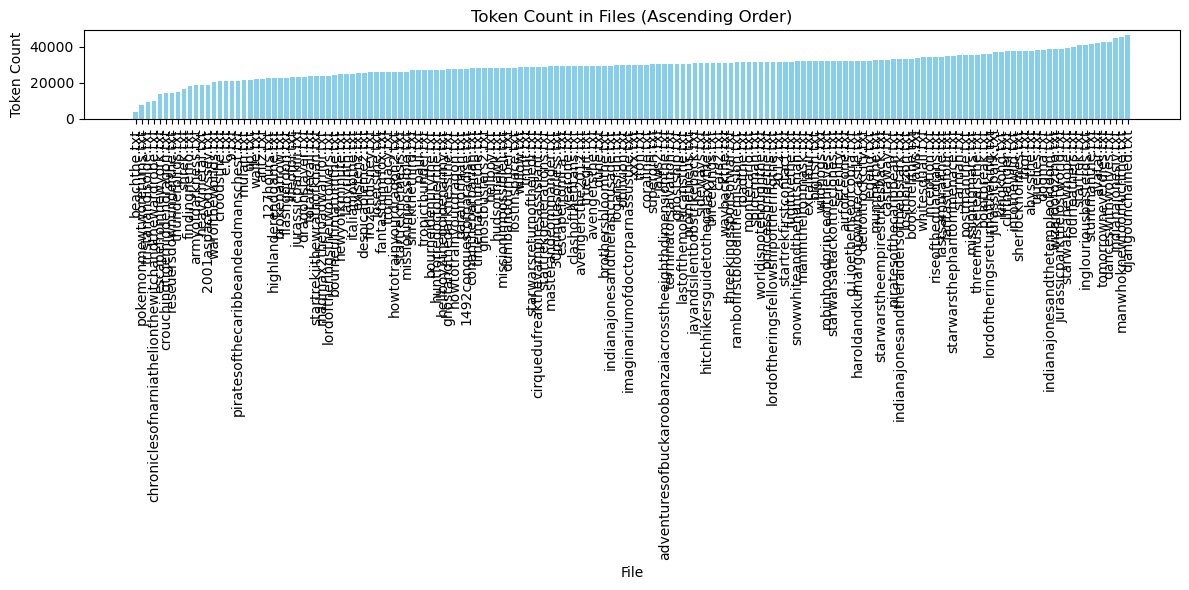

In [16]:
directory_path = "C:/Users/forem/Code/text-as-data/people/Foreman/Adventure"

G = nx.Graph()

file_lengths = {}
for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            tokens = word_tokenize(content)
            file_lengths[filename] = len(tokens)
            G.add_node(filename, size=len(tokens))

sorted_files = sorted(file_lengths.items(), key=lambda x: x[1])

plt.figure(figsize=(12, 6))
plt.bar([file[0] for file in sorted_files], [file[1] for file in sorted_files], color='skyblue')
plt.xlabel('File')
plt.ylabel('Token Count')
plt.title('Token Count in Files (Ascending Order)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [26]:
wcss = [] 
for i in range(1, 20): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 20)
    kmeans.fit(tfidf) 
    wcss.append(kmeans.inertia_)

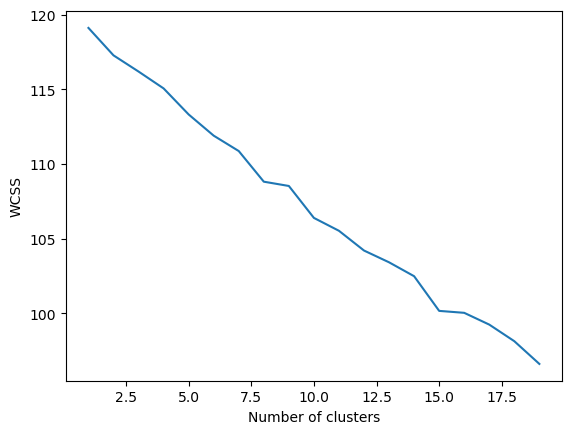

In [27]:
# Let's plot and we'll run this up through 50 possible clusters
plt.plot(range(1, 20), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [32]:
nmf = NMF(n_components=10, 
          random_state=1, 
          max_iter=500, 
          init='nndsvd').fit(tfidf)
nmf_W = nmf.transform(tfidf)
nmf_H = nmf.components_
nmf_W.shape

(166, 10)